In [1]:
sample_01 = "/Users/troydo42/Downloads/1430_Dao_Tan_Pedestrian_02/"
sample_02 = "/Users/troydo42/Downloads/1255_KimMa_Pedestrian/"

In [2]:
import os

def getFramesPath(sample_dir):
    frames = sorted(os.listdir(sample_dir+"frames"))
    total_frames = len(frames)
    frames_path = ["" for x in range(total_frames)]
    # print(len(frames_path))
    for frame in frames:
        root_ext = os.path.splitext(frame)
        if root_ext[1] == '.png':
            frame_index = int(root_ext[0][0:-7])
            # print(frame_index)
            frames_path[frame_index] = os.path.join(sample_dir + "/frames/"+frame)
        
    return frames_path

In [3]:
sample_01_paths = getFramesPath(sample_01)
sample_02_paths = getFramesPath(sample_02)

In [4]:
print(len(sample_01_paths), len(sample_02_paths))

64 39


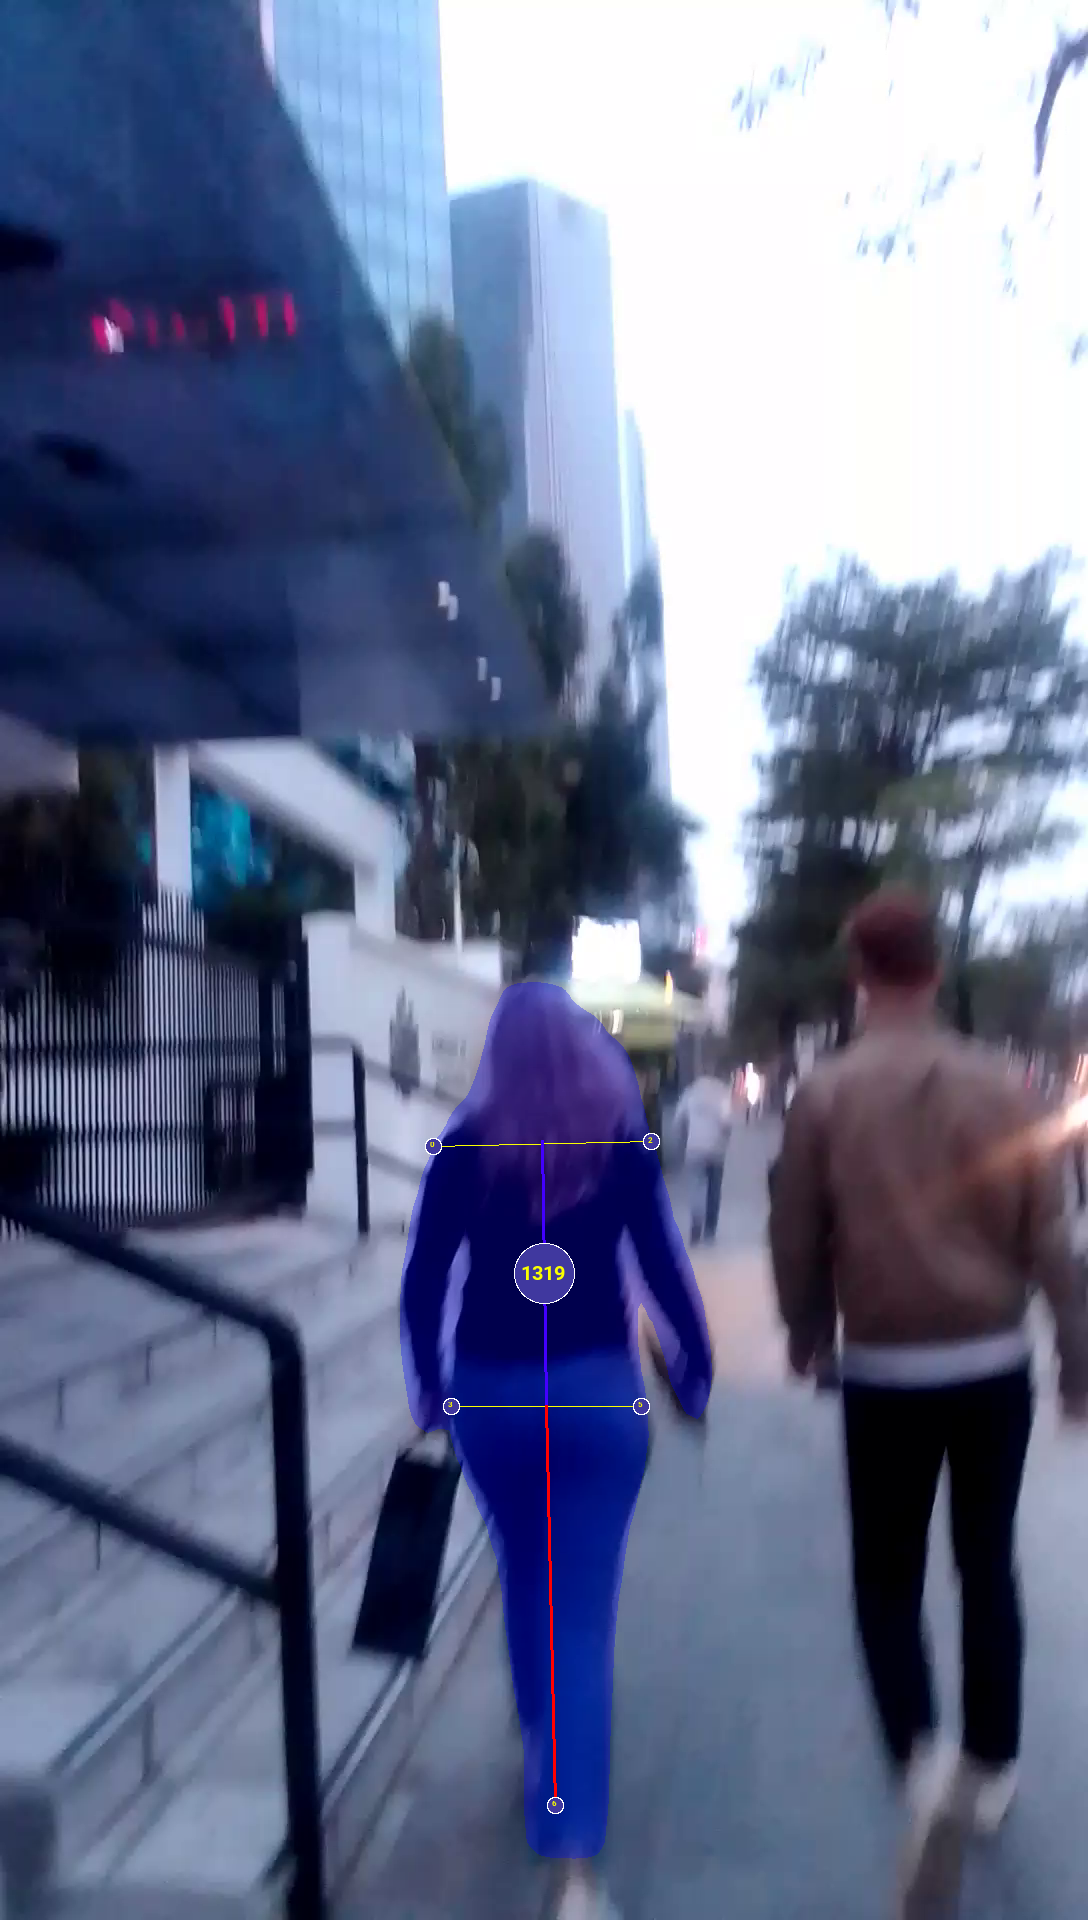

In [5]:
from PIL import Image

image01 = Image.open(sample_01_paths[0])
image01

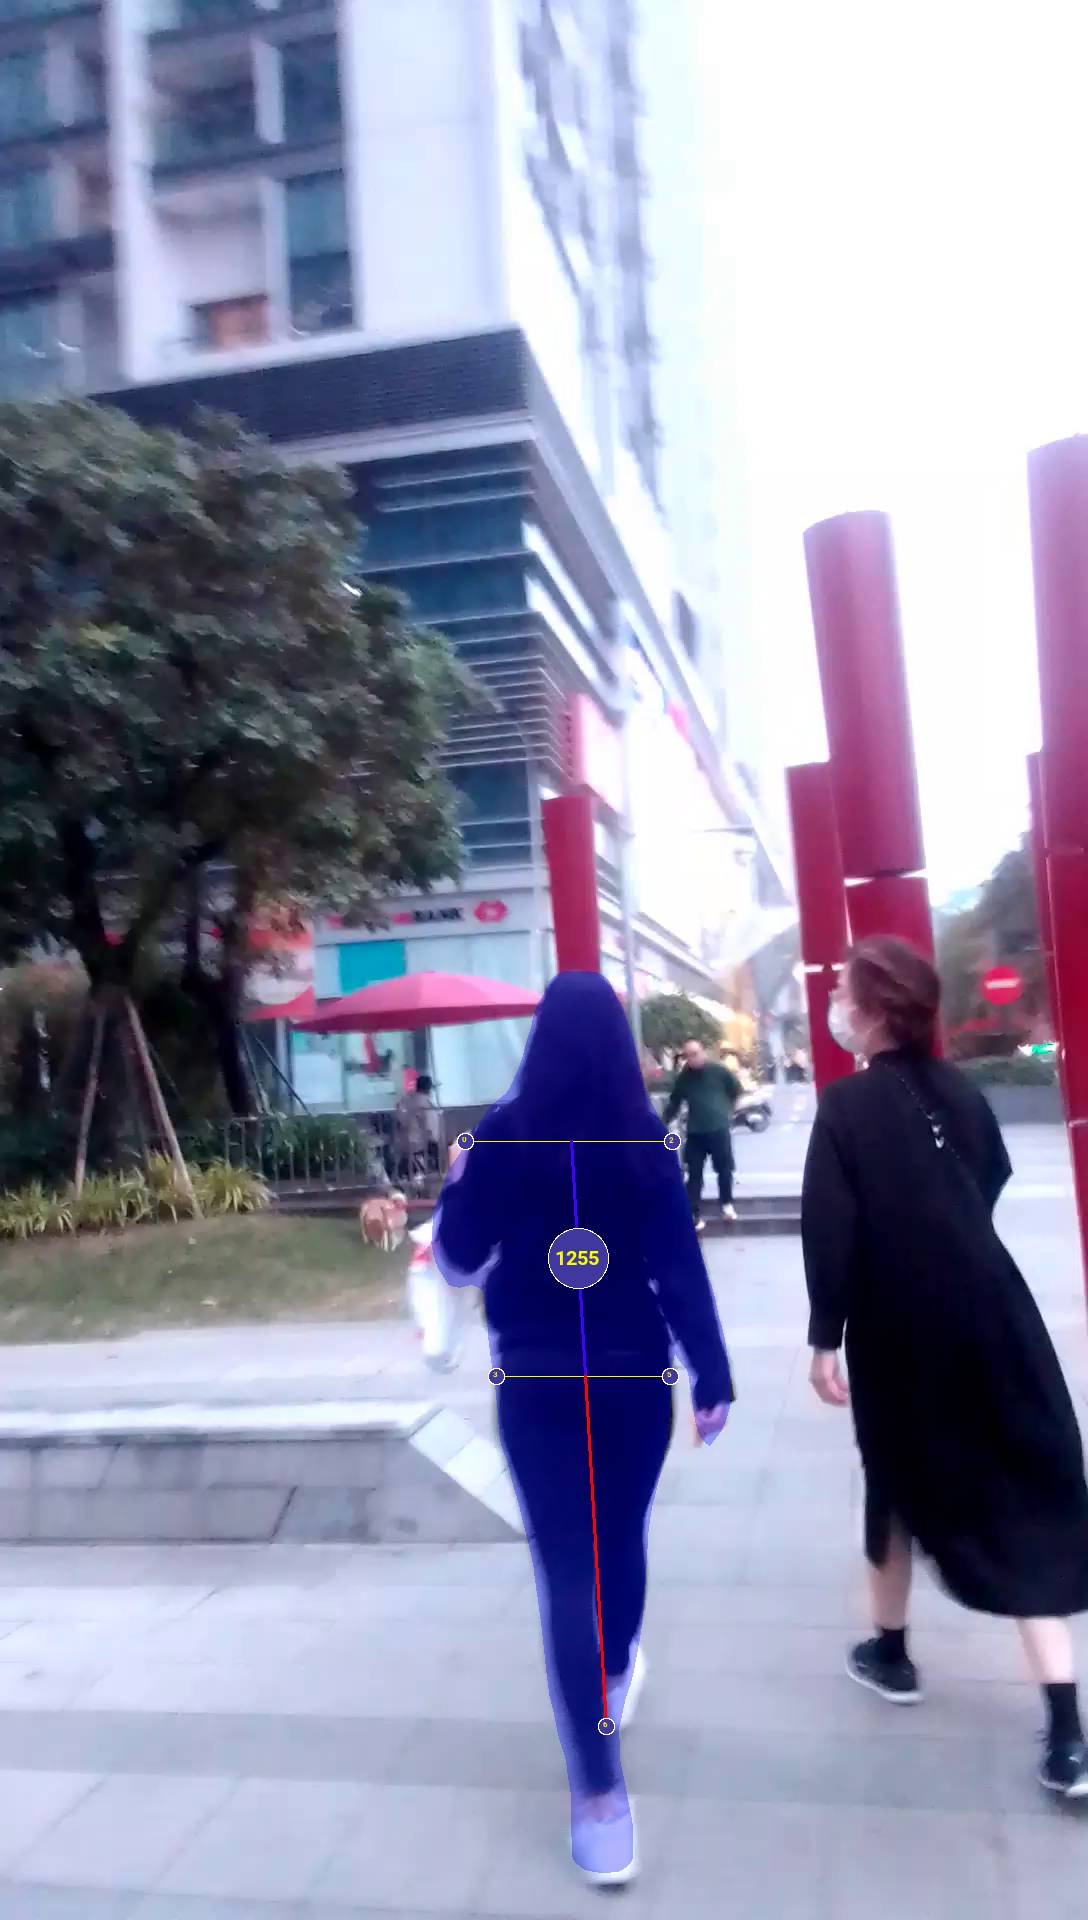

In [6]:
image02 = Image.open(sample_02_paths[0])
image02

In [7]:
from torchvision.transforms.functional import to_pil_image

def stitchPNG(png01, png02):
    # Open PNG Images
    left_image = Image.open(png01)
    right_image = Image.open(png02)
    
    # Create the Extended Video Frame
    width = left_image.width + right_image.width
    height = left_image.height
    new_frame = Image.new("RGB", (width, height))

    # Paste Two Frame into one Larger Frame
    new_frame.paste(im=left_image, box=(0,0))
    new_frame.paste(im=right_image, box=(left_image.width,0))
    return new_frame

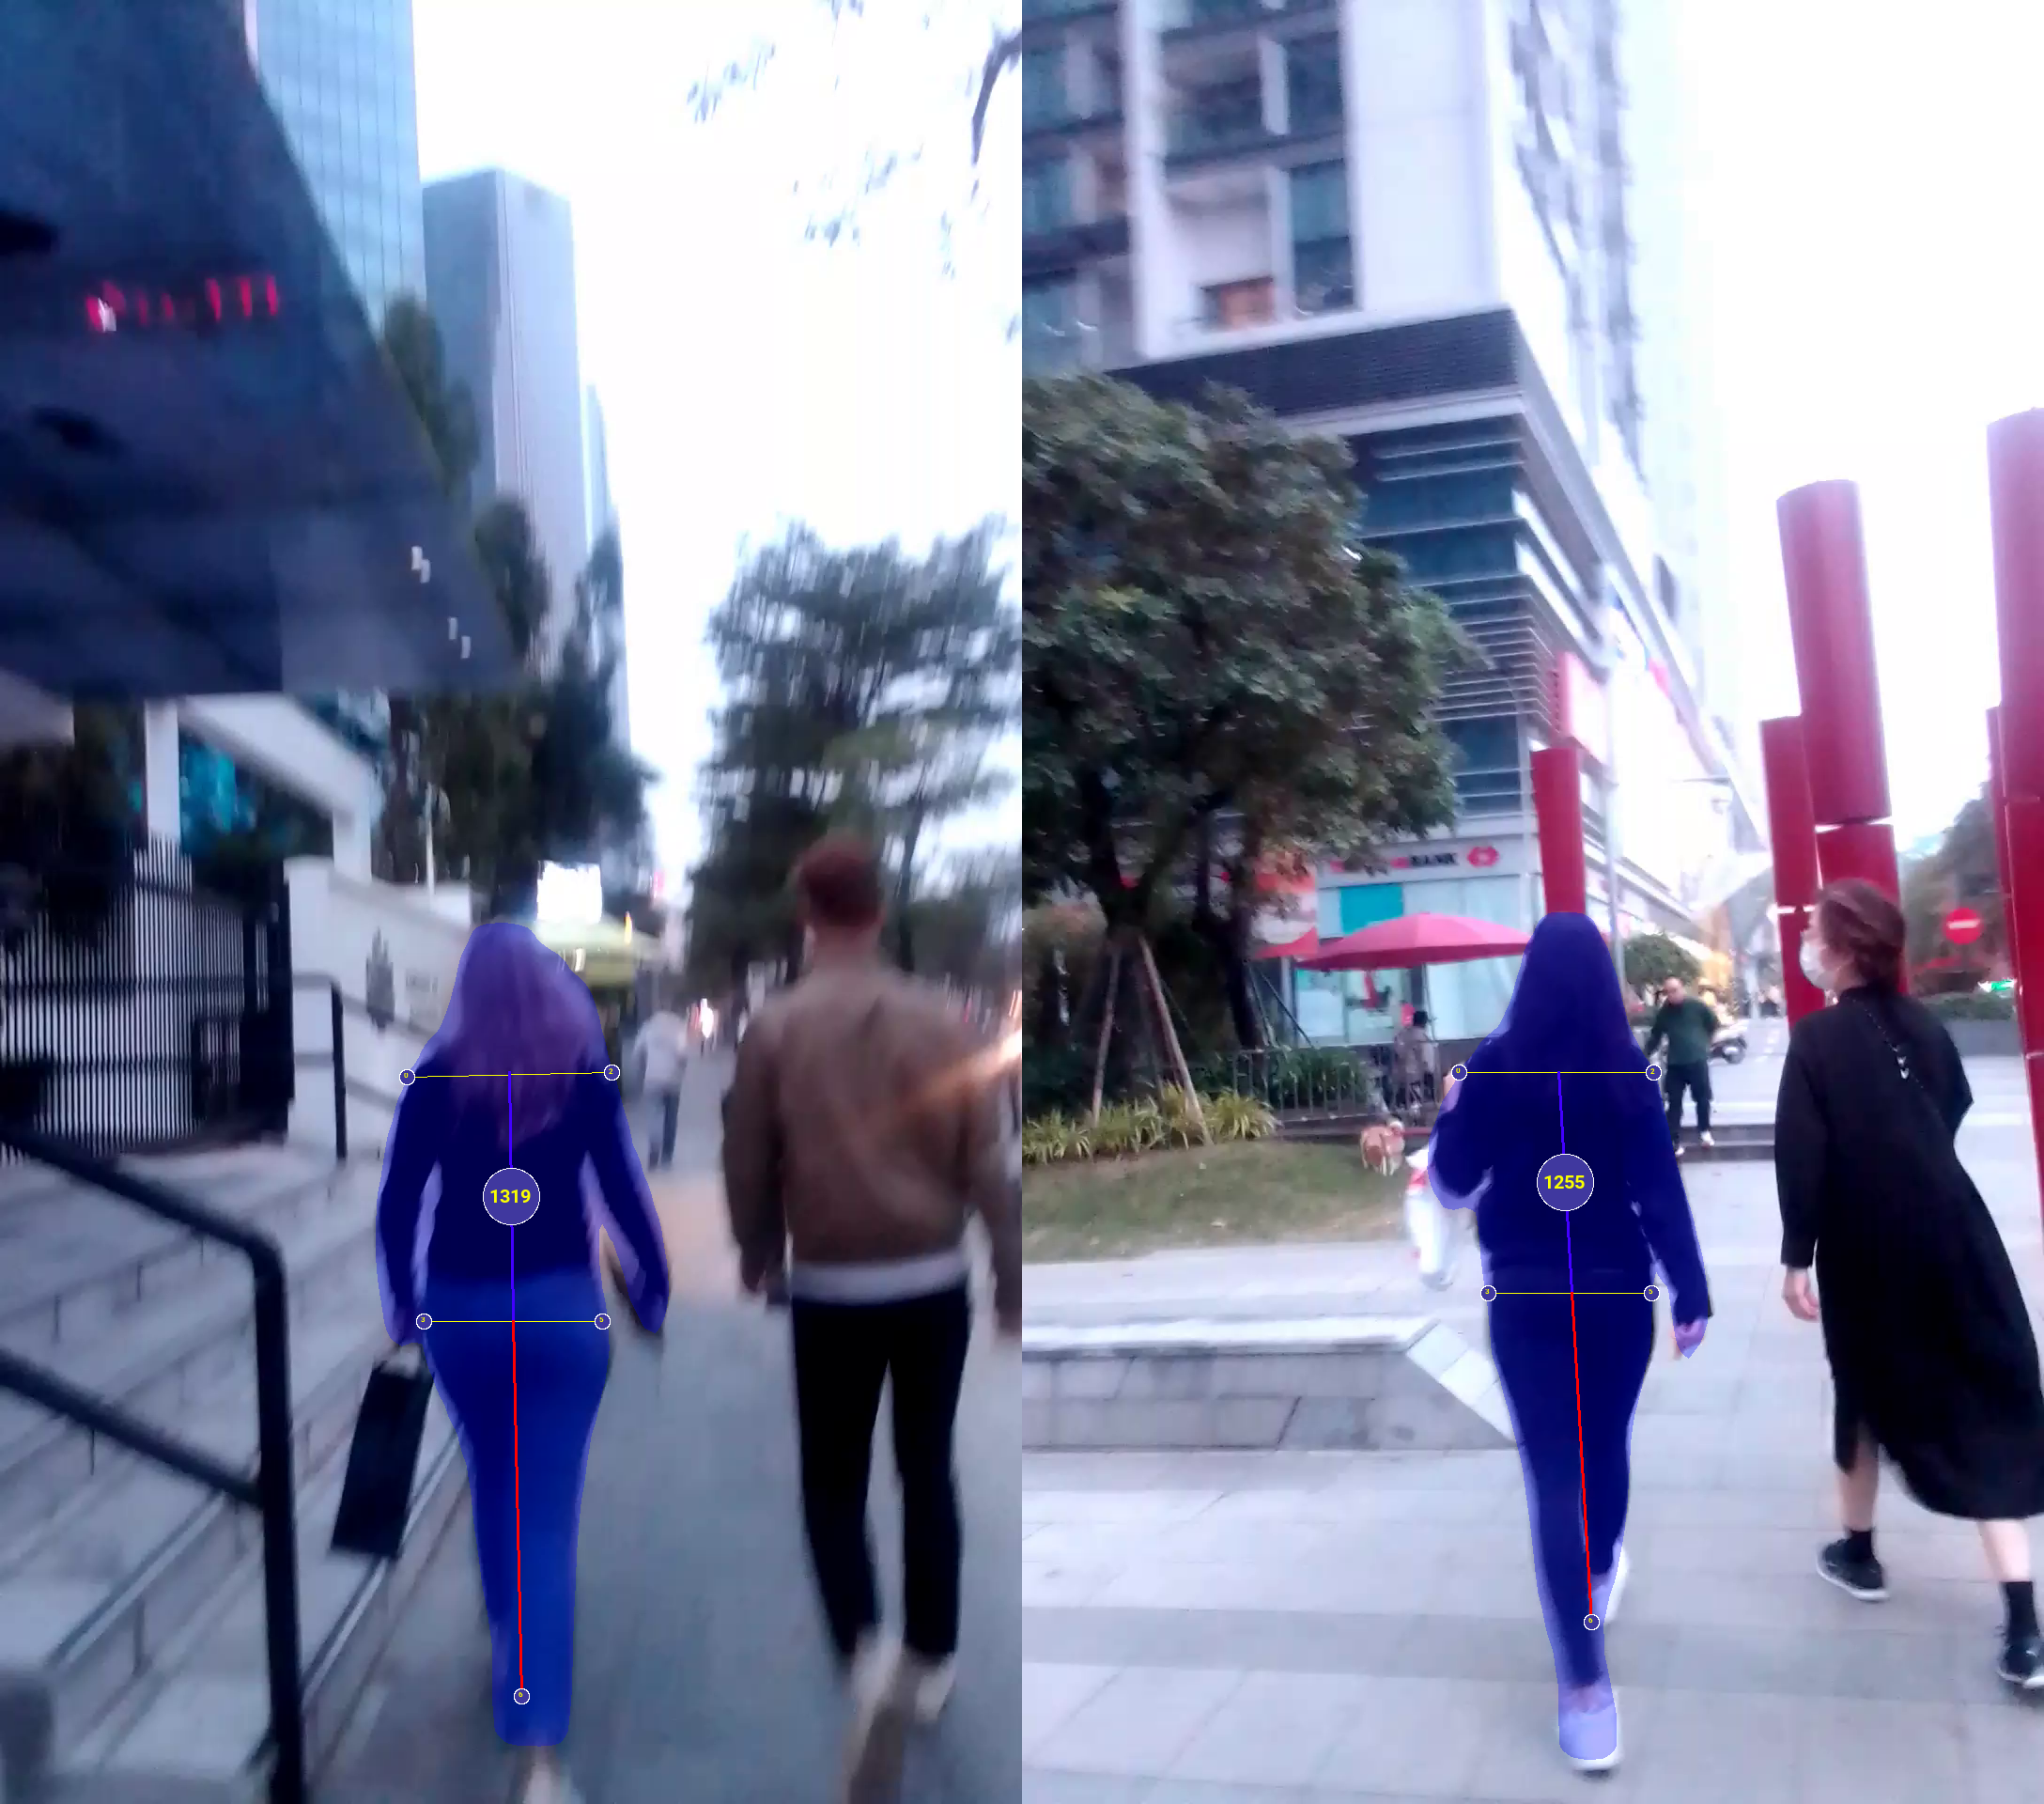

In [8]:
combined_images = stitchPNG(sample_01_paths[0], sample_02_paths[0])
combined_images

In [9]:
total_frames = len(sample_01_paths) + len(sample_02_paths)
for idx in range(total_frames):
    print(idx)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102


In [121]:
def generate_combined_vids(left_target_index, right_target_index, left_dir, right_dir, fps, width, height):
    left_frames_count = 2 * len(left_dir) - left_target_index - 2
    right_frames_count = 2 * len(right_dir) - right_target_index - 2
    total_frames = left_frames_count + right_frames_count
    
    print("Total Frames is ", total_frames)
    
    container = av.open("combined_vid.mp4", mode="w")
    container = av.open("new.mp4", mode="w")

    ### Add mp4 stream to container with fps, width and height
    stream = container.add_stream("mpeg4", rate=math.floor(fps))
    stream.width = width
    stream.height = height
    
    ### Write Encode function to Encode frame into Mpeg4 format
    def encode(image):
        frame = av.VideoFrame.from_image(image)
        for packet in stream.encode(frame):
            container.mux(packet)
            
    for idx in range(total_frames):
        
        ### Processing LEFT Frame
        if idx < left_frames_count + 1:
            
            ### Reverse the Frame and Slowmotion to Left Target
            if idx > len(left_dir) - 1:
                left_index = 2 * len(left_dir) - idx - 2 
                right_index = 0
                print("Frame: ",left_index, right_index)
                combined_frame = stitchPNG(left_dir[left_index], right_dir[right_index])
                slow_motion_frames = [combined_frame] * 6
                for frame in slow_motion_frames:
                    encode(frame)
            else:
                left_index = idx
                right_index = 0
                print("Frame: ",left_index, right_index)
                combined_frame = stitchPNG(left_dir[left_index], right_dir[right_index])
                encode(combined_frame)
                
        else:
            ### Reverse the Frame and Slowmotion to Right Target
            if idx > left_frames_count + len(right_dir) - 1:
                left_index = left_target_index
                right_index = 2 * len(right_dir) - idx + left_frames_count - 3
                print("Frame: ",left_index, right_index)
                combined_frame = stitchPNG(left_dir[left_index], right_dir[right_index])
                slow_motion_frames = [combined_frame] * 6
                for frame in slow_motion_frames:
                    encode(frame)
            else:
                left_index = left_target_index
                right_index = idx - left_frames_count - 1
                print("Frame: ",left_index, right_index)
                combined_frame = stitchPNG(left_dir[left_index], right_dir[right_index])
                encode(combined_frame)
            
    ### Close Container
    container.close()

In [113]:
### Find Most Accurate Scores
import numpy as np
import seaborn as sns

def best_scores(array, min_val):
    scores = []
    for x in array:
        if x < min_val:
            pass
        else:
            scores.append(x)
            
    np_scores = np.array(scores)
    mean = np.mean(np_scores)
    median = np.median(np_scores)
    minim = np.min(np_scores)
    maxim = np.max(np_scores)
    histogram_scores = np.histogram(np_scores)
    print(mean, median)
    sns.distplot(np_scores, hist=True)
    
    return mean, median, minim, maxim

In [114]:
def find_nearest(array, value):
    np_scores = np.array(array)
    distance_array = np.abs(np_scores - value)
    idx = distance_array.argmin()
    return array[idx], idx

In [115]:
import numpy as np

def find_best_frame(sample):
    sample_scores_data = sample + "scores.npy"
    sample_scores = np.load(sample_scores_data)
    mean, median, minim, maxim = best_scores(sample_scores, 1000)
    score, index = find_nearest(sample_scores.tolist(), mean)
    print(score, index,"/",len(sample_scores),"\n",sample_scores )
    return score, index

1472.453125 1487.0
1472 50 / 64 
 [1319 1353 1352 1298 1415 1408 1373 1471 1473 1492 1505 1600 1525 1502
 1494 1482 1495 1527 1541 1388 1477 1475 1519 1492 1521 1515 1372 1349
 1371 1440 1471 1594 1574 1600 1597 1541 1394 1516 1545 1576 1607 1542
 1570 1562 1497 1594 1543 1539 1641 1445 1472 1451 1430 1478 1420 1319
 1251 1234 1478 1379 1423 1494 1517 1399]


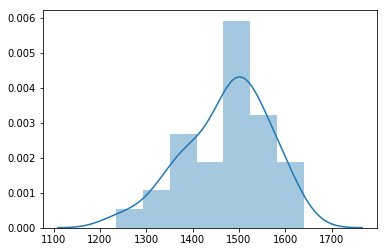

In [116]:
left_score, left_index = find_best_frame(sample_01)

1249.974358974359 1255.0
1250 32 / 39 
 [1255 1207 1231 1198 1208 1089 1118 1222 1212 1285 1304 1376 1369 1366
 1276 1267 1298 1262 1288 1094 1242 1233 1202 1092 1188 1220 1362 1302
 1315 1323 1261 1291 1250 1205 1274 1306 1237 1249 1272]


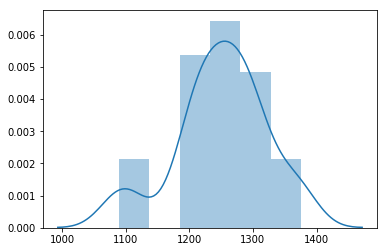

In [117]:
right_score, right_index = find_best_frame(sample_02)

In [122]:
import av
import math

generate_combined_vids(left_index, right_index, sample_01_paths, sample_02_paths, 30, combined_images.width, combined_images.height)

Total Frames is  120
Frame:  0 0
Frame:  1 0
Frame:  2 0
Frame:  3 0
Frame:  4 0
Frame:  5 0
Frame:  6 0
Frame:  7 0
Frame:  8 0
Frame:  9 0
Frame:  10 0
Frame:  11 0
Frame:  12 0
Frame:  13 0
Frame:  14 0
Frame:  15 0
Frame:  16 0
Frame:  17 0
Frame:  18 0
Frame:  19 0
Frame:  20 0
Frame:  21 0
Frame:  22 0
Frame:  23 0
Frame:  24 0
Frame:  25 0
Frame:  26 0
Frame:  27 0
Frame:  28 0
Frame:  29 0
Frame:  30 0
Frame:  31 0
Frame:  32 0
Frame:  33 0
Frame:  34 0
Frame:  35 0
Frame:  36 0
Frame:  37 0
Frame:  38 0
Frame:  39 0
Frame:  40 0
Frame:  41 0
Frame:  42 0
Frame:  43 0
Frame:  44 0
Frame:  45 0
Frame:  46 0
Frame:  47 0
Frame:  48 0
Frame:  49 0
Frame:  50 0
Frame:  51 0
Frame:  52 0
Frame:  53 0
Frame:  54 0
Frame:  55 0
Frame:  56 0
Frame:  57 0
Frame:  58 0
Frame:  59 0
Frame:  60 0
Frame:  61 0
Frame:  62 0
Frame:  63 0
Frame:  62 0
Frame:  61 0
Frame:  60 0
Frame:  59 0
Frame:  58 0
Frame:  57 0
Frame:  56 0
Frame:  55 0
Frame:  54 0
Frame:  53 0
Frame:  52 0
Frame:  51 0
F